## CZ2001 Algorithms Example Class 3
3B: Integration of Mergesort and Insertion Sort

In [1]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt

## MergeSort

In [17]:
class MergeSort:
    key_comp = 0
    
    def run(self, arr):
        start = time.perf_counter()
        sorted_arr = self.mergeSort(arr)
        end = time.perf_counter()

        print("\nYour sorted array is: " + str(sorted_arr))
        print("It took you " + str((end-start)*100) + " * 10^-2 seconds to complete the sort")
        
    def run_time(self, arr):
        start = time.perf_counter()
        sorted_arr = self.mergeSort(arr)
        del sorted_arr
        end = time.perf_counter()
        return end-start
        
    def mergeSort(self, arr):
        # Base case
        if len(arr) <= 1:
            return arr

        # Divide the array into two halves
        mid = len(arr) // 2
        left_arr = arr[:mid] # Partition left array, not inclusive of the middle index
        right_arr = arr[mid:] # Partition right array, inclusive of the middle index

        # Recursively divide the arrays into 2 until the base case
        left_arr = self.mergeSort(left_arr)
        right_arr = self.mergeSort(right_arr)
        return self.merge(left_arr, right_arr)

    # Merge function
    def merge(self, left_arr, right_arr):
        return_arr = []

        # While either the left array or right array still has elements remaining
        while left_arr and right_arr:
            # Compare the first element of the left array to the first element of the right array
            if left_arr[0] < right_arr[0]:
                return_arr.append(left_arr[0]) # Add the element to the end of the array to be returned
                left_arr.pop(0) # Remove the element from the left array
            else:
                return_arr.append(right_arr[0])
                right_arr.pop(0)
            self.key_comp += 1

        if left_arr:
            return_arr.extend(left_arr)
        else:
            return_arr.extend(right_arr)

        return return_arr

## Modified MergeSort (extends MergeSort)

In [18]:
class ModifiedMergeSort(MergeSort):
    #key_comp = 0    # in parent class
    
    def __init__(self, S):
        self.S_val = S
        
    def set_S(self, S):
        self.S_val = S
        
    def mergeSort(self, arr):
        arr_length = len(arr)
        
        # Base case
        if arr_length <= 1:
            return arr
        
        # If the size of the array is smaller than S, carry out insertion sort
        elif arr_length <= self.S_val:
            return self.insertionSort(arr)
        
        # Else, carry out merge sort
        else:
            # Divide the array into two halves
            mid = len(arr) // 2
            left_arr = arr[:mid] # Partition left array, not inclusive of the middle index
            right_arr = arr[mid:] # Partition right array, inclusive of the middle index

            # Recursively divide the arrays into 2 until the base case
            left_arr = self.mergeSort(left_arr)
            right_arr = self.mergeSort(right_arr)
            return self.merge(left_arr, right_arr)
        
    def insertionSort(self, arr):
        arr_length = len(arr)
        for i in range(1, arr_length):
            for j in range(i, 0, -1):
                if arr[j] < arr[j-1]:
                    temp = arr[j]
                    arr[j] = arr[j-1]
                    arr[j-1] = temp
                self.key_comp += 1
        return arr

## Helper Methods to Populate Array
Ways of populating array:
- User input
- n number of random integers
- n number of integers in decreasing order

In [19]:
def populate_array_input(arr):
    while True:
        val = input("Enter a number, type a non-number to quit: ")
        try:
            int(val)
        except ValueError:
            break
        arr.append(val)
        
def populate_array_random(arr,arr_length):

    for i in range(int(arr_length)):
        arr.append(random.randint(-100000, 100000))


def populate_array_decreasing(arr,arr_length):


    for i in range(int(arr_length)):
        arr.append(random.randint(-100000, 100000))
    arr.sort(reverse=True)

## Run MergeSort

In [5]:
mSort = MergeSort()
arr = []
populate_array_input(arr)
mSort.run(arr)

Enter a number, type a non-number to quit: s

Your sorted array is: []
It took you 0.0002300000005561742 * 10^-2 seconds to complete the sort


In [7]:
mmSort = ModifiedMergeSort(5)
arr = []
populate_array_random(arr,23)
mmSort.run(arr)


Your sorted array is: [-94477, -70291, -58817, -50295, -50093, -38957, -36238, -24506, -24165, -19253, -19121, -6743, -674, 1153, 7106, 23236, 43436, 47915, 49152, 56772, 66548, 95275, 96412]
It took you 0.00837000000046828 * 10^-2 seconds to complete the sort


In [8]:
mmSort.set_S(3)
arr = []
populate_array_random(arr,23)
mmSort.run(arr)


Your sorted array is: [-81749, -71999, -44305, -43894, -35152, -29802, -17421, -2168, 2068, 6893, 7910, 12956, 26833, 28824, 48573, 49866, 66308, 70806, 83929, 95503, 97958, 99673, 99963]
It took you 0.014059999999460615 * 10^-2 seconds to complete the sort


In [9]:
arr = []
populate_array_decreasing(arr,23)
mmSort.run(arr)


Your sorted array is: [-99106, -90809, -88472, -75527, -72987, -72414, -49493, -43799, -27063, -5514, 2933, 28025, 37708, 43290, 45303, 46001, 59584, 66213, 78111, 89731, 91690, 95570, 99870]
It took you 0.011510000000214404 * 10^-2 seconds to complete the sort


# Get runtimes for different values of S and n

Enter the value of n50
     S  average case  worst case
0    0      0.000121    0.000087
1    1      0.000107    0.000085
2    2      0.000105    0.000085
3    3      0.000097    0.000075
4    4      0.000100    0.000076
5    5      0.000095    0.000074
6    6      0.000091    0.000078
7    7      0.000091    0.000080
8    8      0.000090    0.000078
9    9      0.000090    0.000079
10  10      0.000095    0.000079
11  11      0.000090    0.000079
12  12      0.000096    0.000092
13  13      0.000103    0.000109
14  14      0.000104    0.000108
15  15      0.000102    0.000107
16  16      0.000104    0.000107
17  17      0.000104    0.000109
18  18      0.000105    0.000108
19  19      0.000106    0.000109
20  20      0.000105    0.000109
21  21      0.000105    0.000110
22  22      0.000104    0.000116
23  23      0.000108    0.000109
24  24      0.000105    0.000113
25  25      0.000150    0.000183
26  26      0.000149    0.000185
27  27      0.000150    0.000184
28  28      0.000149

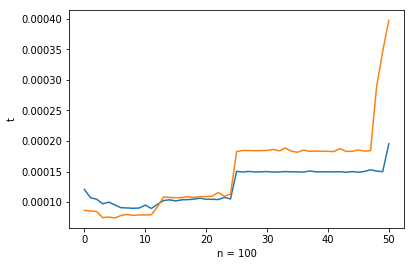

In [20]:
def iterate_sort_random(arr_length):
    # generate a random array of size n
    arr = []
    time_taken_list = []
    populate_array_random(arr,arr_length)
    for i in range(0, arr_length+1):
        mms = ModifiedMergeSort(i)
        #get average of 100 runs
        total_runtime = 0
        for j in range(100):
            total_runtime += mms.run_time(arr)
        average_runtime_100 = total_runtime/100
        time_taken_list.append(average_runtime_100)
    return time_taken_list

def iterate_sort_worst(arr_length):
    # generate a random array of size n
    arr = []
    time_taken_list = []
    populate_array_decreasing(arr,arr_length)
    for i in range(0, arr_length+1):
        mms = ModifiedMergeSort(i)
        #get average of 100 runs
        total_runtime = 0
        for j in range(100):
            total_runtime += mms.run_time(arr)
        average_runtime_100 = total_runtime/100
        time_taken_list.append(average_runtime_100)
    return time_taken_list

n = int(input("Enter the value of n\n"))
average_runtime = iterate_sort_random(n)
worst_runtime = iterate_sort_worst(n)


df = pd.DataFrame({"S": range(0, n+1), "average case": average_runtime, "worst case": worst_runtime})
print(df)
plt.plot(df["S"], df["average case"], df["S"], df["worst case"])
plt.ylabel('t')
plt.xlabel('n = 100')
plt.show()
